# Tom's AK86 with J97

## Wanting 3 tricks

## Gavin played for the Q to drop singleton or doubleton

## Tom prefers the double finesse

In [2]:
# imports
from importlib import reload
import numpy as np

import seaborn as sns
import pandas

from bridgepy import deals, assess

# Build the hands

In [3]:
Ndeals = 50000 # Number of hands to build

## Constraints

In [4]:
missing = [2,3,4,5,10,12]  # Q = 12
N1 = (0,6) # Possible number of cards in hand 1
N2 = (0,6) 

## Do it

In [5]:
# Shuffle them 10000 times
r = [np.random.permutation(missing) for i in range(Ndeals)]
r = np.array(r)
r.shape

(50000, 6)

In [6]:
r

array([[12,  5,  2, 10,  3,  4],
       [12, 10,  4,  5,  3,  2],
       [ 2,  4,  5, 12, 10,  3],
       ...,
       [10,  4,  3,  5,  2, 12],
       [ 5,  2, 10,  4,  3, 12],
       [ 5, 10,  4,  3,  2, 12]])

## Get the hand distribution

### Probabilities

In [7]:
reload(deals)
ncards, probs = deals.all_probs(6)
ncards, probs

([0, 1, 2, 3, 4, 5, 6],
 [0.007453416149068322,
  0.07267080745341616,
  0.24223602484472048,
  0.3552795031055901,
  0.24223602484472048,
  0.07267080745341616,
  0.007453416149068322])

In [8]:
cum_probs = np.cumsum(probs)
cum_probs

array([0.00745342, 0.08012422, 0.32236025, 0.67763975, 0.91987578,
       0.99254658, 1.        ])

## Random distributions

In [9]:
reload(deals)
r_n1 = deals.random_ncards(6, Ndeals)
r_n1

array([2, 2, 3, ..., 4, 2, 2])

### Plot

<Axes: >

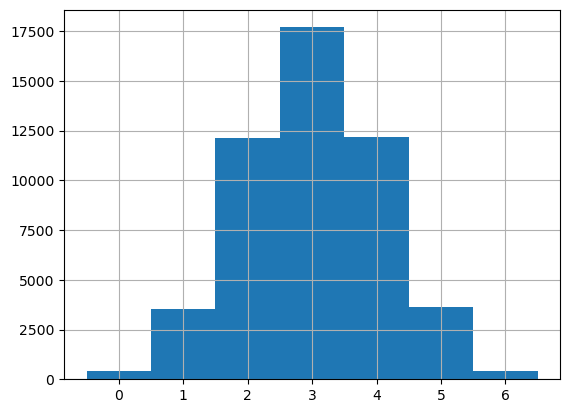

In [10]:
df = pandas.DataFrame()
df['n1'] = r_n1
bin_edges = np.arange(-0.5, 7.5, 1)
df.n1.hist(bins=bin_edges)

# Time to assess!

## Gavin

In [11]:
# Slice
gd1 = (r_n1 <= 2) & (r_n1 > 0)
gd2 = ((6-r_n1) <= 2) & (6-r_n1 > 0)

h1 = []
for i1 in np.where(gd1)[0]:
    h1.append(r[i1,0:r_n1[i1]])
h2 = []
for i2 in np.where(gd2)[0]:
    h2.append(r[i2,r_n1[i2]:])

In [12]:
# Query
G1 = [12 in ih1 for ih1 in h1]
G2 = [12 in ih2 for ih2 in h2]
N_Gavin = np.sum(G1) + np.sum(G2)
P_Gavin = N_Gavin / Ndeals
P_Gavin

0.18646

## Tom

In [13]:
h1 = []
for ii in range(Ndeals):
    h1.append(r[ii,0:r_n1[ii]])
# Check
Q_in = np.array([12 in ih1 for ih1 in h1])
T_in = np.array([10 in ih1 for ih1 in h1])
#
both = Q_in & T_in
P_Tom = np.sum(both)/Ndeals
P_Tom

0.24136

----

# Testing

In [80]:
reload(assess)
Q_qdict = assess.parse_query([12, 0, 52, 1])
T_qdict = assess.parse_query([10, 0, 52, 1])
Q_in_2 = assess.query_deals(r, r_n1, Q_qdict)
T_in_2 = assess.query_deals(r, r_n1, T_qdict)
np.sum(Q_in_2 & T_in_2) / Ndeals

0.24002

In [83]:
reload(assess)
final = assess.test_deals(r, r_n1, [(12,0,52,1), (10,0,52,1)])
np.sum(final)

12001

In [74]:
qdict

{'card': 12, 'min_n': 0, 'max_n': 52, 'hand': 1}

----

## From Google's Bard

In [10]:
import itertools

def calculate_split_percentages(num_cards:int=6):
    total_combinations = 2**num_cards  # Each card can go to either player
    split_counts = {}
    for split in itertools.product((0, 1), repeat=num_cards):  # Generate all possible splits
        player1_count = sum(split)
        player2_count = num_cards - player1_count
        split_tuple = (player1_count, player2_count)
        split_counts[split_tuple] = split_counts.get(split_tuple, 0) + 1

    for split, count in split_counts.items():
        percentage = (count / total_combinations) * 100
        print(f"{split[0]} cards for Player 1, {split[1]} cards for Player 2: {percentage:.2f}%")

#if __name__ == "__main__":
#    num_cards = 6
#    calculate_split_percentages(num_cards)


In [11]:
calculate_split_percentages()

0 cards for Player 1, 6 cards for Player 2: 1.56%
1 cards for Player 1, 5 cards for Player 2: 9.38%
2 cards for Player 1, 4 cards for Player 2: 23.44%
3 cards for Player 1, 3 cards for Player 2: 31.25%
4 cards for Player 1, 2 cards for Player 2: 23.44%
5 cards for Player 1, 1 cards for Player 2: 9.38%
6 cards for Player 1, 0 cards for Player 2: 1.56%


## This doesn't match what is online..

## Vacant

In [12]:
def vacant(n1, n2, ninit:tuple=(13,13)):
    prob = 1.
    ntot = n1 + n2
    # Fill in hand 1
    count1=0
    while(count1 < n1):
        prob *= (ninit[0]-count1) / (ninit[0]+ninit[1]-count1)
        count1 += 1
    # Now hand 2
    count2=0
    while(count2 < n2):
        prob *= (ninit[1]-count2) / (ninit[0]+ninit[1]-count1-count2)
        count2 += 1
    # Return
    return prob

In [13]:
vacant(3,0)

0.10999999999999999

In [14]:
vacant(2,2)

0.06782608695652173

In [19]:
factorial(0)

1

In [22]:
from math import factorial
def Pab(a,b,nhands:tuple=(13,13)):
    # First term
    fter = factorial(a+b)/factorial(a)/factorial(b)
    # Second term, numerator
    num = factorial(nhands[0])*factorial(nhands[1])*factorial(nhands[0]+nhands[1]-a-b)
    # Second term, denumerator
    den = factorial(nhands[0]+nhands[1])*factorial(nhands[0]-a)*factorial(nhands[1]-b)
    # Return
    return fter * num / den

In [23]:
Pab(3,0)

0.11

In [24]:
Pab(2,2)

0.4069565217391304